train preds: 0.26208703425879365
test preds: 0.3864641850064208


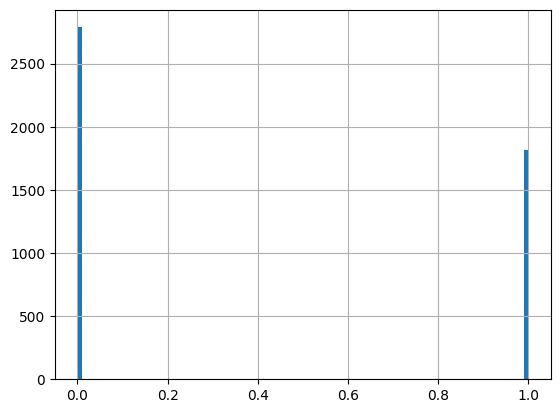

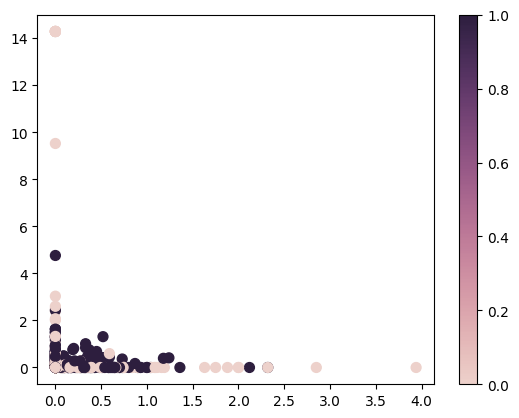

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

url = (
    "./spambase.data"
)
spambase = pd.read_csv(url, header=None)

spambase.columns = [
    "word_freq_make",
    "word_freq_address",
    "word_freq_all",
    "word_freq_3d",
    "word_freq_our",
    "word_freq_over",
    "word_freq_remove",
    "word_freq_internet",
    "word_freq_order",
    "word_freq_mail",
    "word_freq_receive",
    "word_freq_will",
    "word_freq_people",
    "word_freq_report",
    "word_freq_addresses",
    "word_freq_free",
    "word_freq_business",
    "word_freq_email",
    "word_freq_you",
    "word_freq_credit",
    "word_freq_your",
    "word_freq_font",
    "word_freq_000",
    "word_freq_money",
    "word_freq_hp",
    "word_freq_hpl",
    "word_freq_george",
    "word_freq_650",
    "word_freq_lab",
    "word_freq_labs",
    "word_freq_telnet",
    "word_freq_857",
    "word_freq_data",
    "word_freq_415",
    "word_freq_85",
    "word_freq_technology",
    "word_freq_1999",
    "word_freq_parts",
    "word_freq_pm",
    "word_freq_direct",
    "word_freq_cs",
    "word_freq_meeting",
    "word_freq_original",
    "word_freq_project",
    "word_freq_re",
    "word_freq_edu",
    "word_freq_table",
    "word_freq_conference",
    "char_freq_;",
    "char_freq_(",
    "char_freq_[",
    "char_freq_!",
    "char_freq_$",
    "char_freq_#",
    "capital_run_length_average",
    "capital_run_length_longest",
    "capital_run_length_total",
    "spamOrNot",
]
#correlation_matrix = spambase.corr()
#correlation_matrix["spamOrNot"]
spambase["spamOrNot"].hist(bins=100)

X = spambase.drop("spamOrNot", axis=1)
X = X.values
y = spambase["spamOrNot"]
y = y.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12345
)

# KNN Model paired with a n_neigobors with my own value
knn_model = KNeighborsRegressor(n_neighbors=3)

knn_model.fit(X_train, y_train)
# train preds
train_preds = knn_model.predict(X_train)
mse_train = mean_squared_error(y_train, train_preds)
rmse_train = sqrt(mse_train)
print("train preds: " + str(rmse_train))
# test preds
test_preds = knn_model.predict(X_test)
mse_test = mean_squared_error(y_test, test_preds)
rmse_test = sqrt(mse_test)
print("test preds: " + str(rmse_test))

# draw scatter plot by using either test_preds or y_test
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap
)

f.colorbar(points)
plt.show()